# <font color='red' > Please Suggest Ways to Improve the evaluation score in the comment section </font>

# Importing The Required Libraries.

In [ ]:
import numpy as np 
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_log_error
import math

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from time import time
import time

from sklearn.linear_model import LinearRegression
from sklearn.svm import  SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# Importing The Dataset.

In [ ]:
train=pd.read_csv('/kaggle/input/machine-hack-house-price-prediction/Train.csv')
submission=pd.read_csv('/kaggle/input/machine-hack-house-price-prediction/sample_submission.csv')
test=pd.read_csv('/kaggle/input/machine-hack-house-price-prediction/Test.csv')
print(train.shape)
train.head()

In [ ]:
print(test.shape)
test.head()

In [ ]:
submission.head()

We can see that the test dataset is three times larger than the train dataset.

# A quick pandas-profiling EDA

In [ ]:
report = pp.ProfileReport(train)
report

### Encoding the Categorical features.

In [ ]:
categorical_features_train=pd.get_dummies(train.iloc[:,[0,4]])
categorical_features_test=pd.get_dummies(test.iloc[:,[0,4]])
categorical_features_train.head()

In [ ]:
train=train.drop(['POSTED_BY','BHK_OR_RK','ADDRESS','LONGITUDE','LATITUDE'],axis=1)
test=test.drop(['POSTED_BY','BHK_OR_RK','ADDRESS','LONGITUDE','LATITUDE'],axis=1)
train.head()

In [ ]:
test.head()

In [ ]:
train=pd.concat([train,categorical_features_train],axis=1)
test=pd.concat([test,categorical_features_test],axis=1)
train.head()

In [ ]:
test.head()

In [ ]:
X = train.drop("TARGET(PRICE_IN_LACS)",axis=1)   #Feature Matrix
y = train["TARGET(PRICE_IN_LACS)"]
X.head()

# Using Pearson Correlation to drop the similar features.

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X, 0.85)
print(len(set(corr_features)))
print(corr_features)

# Splitting The Dataset.

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.1)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

In [ ]:
X_train=X_train.drop(corr_features,axis=1)
X_val=X_val.drop(corr_features,axis=1)
test=test.drop(corr_features,axis=1)
X_train.head()

In [ ]:
test.head()

So now we have the datasets ready,lets fit and see the accuracy.

### I am going to create a modular function here,so that I can test the different types of regressors.

In [ ]:
names = [ 
        "K Nearest Neighbour Regressor",
         "Decison Tree Regressor",
         "Random Forest Regressor",

         ]
regressors = [
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
        ]

zipped_clf = zip(names,regressors)

### The metric used in this Competetion is Root Mean Square Log Error.
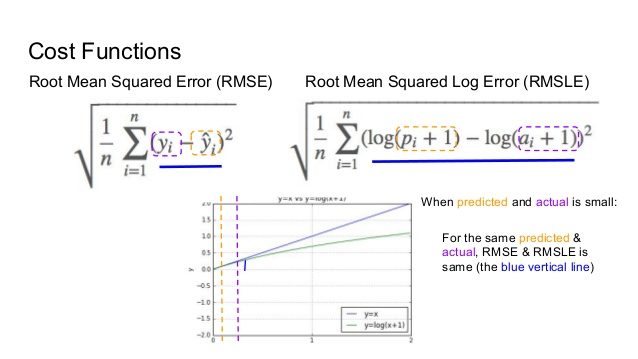

There was some problem arising when I used numpy and sklearn to find RMSLE,some negative values were being predicted,So I had to manually define the Function.

In [ ]:
def rmsle(y, y_pred):
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

def acc_summary(pipeline, X_train, y_train, X_val, y_val):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_val)
    #rmsle = np.sqrt(mean_squared_log_error(y_val,y_pred ))
    loss= rmsle(y,y_pred)
    print("RMSLE : {0:.2f}".format(loss))
    #print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return rmsle


def regressor_comparator(X_train,y_train,X_val,y_val,regressor=zipped_clf): 
    result = []
    for n,r in regressor:
        checker_pipeline = Pipeline([
            ('regressor', r)
        ])
        print("Validation result for {}".format(n))
        #print(r)
        clf_acc= acc_summary(checker_pipeline,X_train, y_train, X_val, y_val)
        result.append((n,clf_acc))
    return result

In [ ]:
regressor_comparator(X_train,y_train,X_val,y_val)

# Please Suggest Ways to improve the RMSLE,Your help will be really appreciated.Thankyou...